In [1]:
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

# Table Contents

* [**1.** Tensor Basics](#tensor-basics)
    * [**1.1** Tensor Initialization](#tensor-initialization)
    * [**1.2** Data Type / Data Type Conversion](#data-type)
    * [**1.3** Tensor Shape](#tensor-shape)
    * [**1.4** Tensor Copy](#tensor-copy)
    * [**1.5** Basic Operations](#basic-operations)
        * Element-wise
        * In-place
    * [**1.6** Reshape](#reshape)
    * [**1.7** Convert b/w Tensor and Numpy](#convert)
* [**2.** Autograd](#autograd)
    * [**2.1** Calculate Gradients](#calculate-gradients)
    * [**2.2** Prevent Tracking Gradients](#prevent-tracking-grads)
    * [**2.3** Reset(empty) Gradients](#reset-grads)

# <a name="tensor-basics">1. Tensor Basics</a>

---

## <a name="tensor-initialization">1.1 Tensor Initialization</a>

<code>empty</code>

In [4]:
d1 = torch.empty(1)
d2 = torch.empty(1,2)
d3 = torch.empty(1,2,3)

print(d1.shape)
print(d2.shape)
print(d3.shape)

torch.Size([1])
torch.Size([1, 2])
torch.Size([1, 2, 3])


<code>rand</code>

In [5]:
x = torch.rand(2,2)
print(x)

tensor([[0.8599, 0.6840],
        [0.7834, 0.5486]])


<code>randn</code>

In [6]:
x = torch.randn(2,2)
print(x)

tensor([[-0.8464,  1.1656],
        [ 1.5682,  0.2010]])


<code>zeros</code> <code>ones</code>

In [7]:
x = torch.zeros(2,2)
y = torch.zeros(2,2)
print(x)
print(y)

tensor([[0., 0.],
        [0., 0.]])
tensor([[0., 0.],
        [0., 0.]])


<code>torch.tensor()</code>

In [151]:
x = torch.tensor([2.5, 0.1, 5], dtype=torch.float16)
print(x)
print(x.dtype)

tensor([2.5000, 0.1000, 5.0000], dtype=torch.float16)
torch.float16


---

## <a name="data-type">1.2 Data Type</a>

### Check data type

In [11]:
x = torch.ones(2,2)
print("x type:", x.dtype)

y = torch.ones(2,2, dtype=torch.float16)
print("y type:", y.dtype)

x type: torch.float32
y type: torch.float16


### Convert data type

<code>x.int()</code> <code>x.float()</code> <code>x.bool()</code> ...


In [150]:
x = torch.arange(4) # dtype = int64
print("tensor: ",x)
print("-------------------------------")
print("tensor.bool():",x.bool())
print("tensor.short():",x.short())
print("tensor.long():",x.long())
print("tensor.half():",x.half())
print("tensor.float():",x.float())
print("tensor.double():",x.double())

tensor:  tensor([0, 1, 2, 3])
-------------------------------
tensor.bool(): tensor([False,  True,  True,  True])
tensor.short(): tensor([0, 1, 2, 3], dtype=torch.int16)
tensor.long(): tensor([0, 1, 2, 3])
tensor.half(): tensor([0., 1., 2., 3.], dtype=torch.float16)
tensor.float(): tensor([0., 1., 2., 3.])
tensor.double(): tensor([0., 1., 2., 3.], dtype=torch.float64)


---

## <a name="tensor-shape">1.3 Tensor Shape</a>

<code>x.shape</code> <code>x.size()</code>

In [148]:
x = torch.ones(3, 3, dtype=torch.double)
print(f"x shape: {x.shape}")
print(f"x shape: {x.size()}")

x shape: torch.Size([3, 3])
x shape: torch.Size([3, 3])


---

## <a name="tensor-copy">1.4 Tensor Copy</a>

<code>**x.clone().detach()**</code>

* If you just assign <code>x = y</code>, you're passing the <code>reference</code> so you need to use <code>x = y.clone()</code>
* <code>.detach()</code> is to separete from <code>computation graph</code>

In [154]:
# 1) x.clone().detach()
x = torch.rand(1,2)
y = x.clone().detach()
print(f"Original x: {x}")
print(f"Original y: {y}")

# Modify "x"
x.add_(1)

print("-"*30)
print("After Modifying x | .clone().detach()")
print(f"x: {x}")
print(f"y: {y}")

Original x: tensor([[0.7119, 0.1766]])
Original y: tensor([[0.7119, 0.1766]])
------------------------------
After Modifying x | .clone().detach()
x: tensor([[1.7119, 1.1766]])
y: tensor([[0.7119, 0.1766]])


In [155]:
# 2) Assignment Operator
x = torch.rand(1,2)
y = x
print(f"Original x: {x}")
print(f"Original y: {y}")

# Modify "x"
x.add_(1)

print("-"*30)
print("After Modifying x | x = y")
print(f"x: {x}")
print(f"y: {y}")

Original x: tensor([[0.5889, 0.4031]])
Original y: tensor([[0.5889, 0.4031]])
------------------------------
After Modifying x | x = y
x: tensor([[1.5889, 1.4031]])
y: tensor([[1.5889, 1.4031]])


---

## <a name="basic-operations">1.5 Basic Operations</a>

### 1) Element-wise operations

In [158]:
x = torch.rand(2,2)
y = torch.rand(2,2)

add = x + y # torch.add(x,y)
sub = x - y # torch.sub(x,y)
mul = x * y # torch.mul(x,y)
div = x / y # torch.div(x,y)

print(f"x + y: {add}")
print(f"x - y: {sub}")
print(f"x * y: {mul}")
print(f"x / y: {div}")

x + y: tensor([[1.3532, 0.2733],
        [1.3901, 0.7752]])
x - y: tensor([[-0.2460, -0.2085],
        [-0.3234, -0.5713]])
x * y: tensor([[0.4426, 0.0078],
        [0.4569, 0.0686]])
x / y: tensor([[0.6923, 0.1345],
        [0.6225, 0.1514]])


### 2) In-place operations

In [144]:
x = torch.rand(1,2)
y = torch.rand(1,2)
x_temp = x.clone().detach()
y_temp = y.clone().detach()

# Normal Operations
add = x + y # torch.add(x,y)
sub = x - y # torch.sub(x,y)
mul = x * y # torch.mul(x,y)
div = x / y # torch.div(x,y)

# Some Useful Functions
def getClone(t):
    return t.clone().detach()

def isEqual(t1, t2):
    comp = torch.eq(t1, t2) # torch.eq(t1, t2) <=> t1 == t2, element-wise comparison!
    return torch.sum(comp) == torch.numel(t1)

# In-place operations: (operator)_
assert isEqual(x.add_(y),add) == True
x = getClone(x_temp)

assert isEqual(x.sub_(y),sub) == True
x = getClone(x_temp)

assert isEqual(x.mul_(y),mul) == True
x = getClone(x_temp)

assert isEqual(x.div_(y),div) == True
x = getClone(x_temp)

print("DONE!")

DONE!


---

## <a name="reshape">1.6 Reshape</a>

<code>x.view()</code>

In [12]:
x = torch.rand(4,4)

r1 = x.view(16)
r2 = x.view(-1)
r3 = x.view(-1, 8)
print(r1.size())
print(r2.size())
print(r3.size())

torch.Size([16])
torch.Size([16])
torch.Size([2, 8])


<code>x.reshape()</code>

In [13]:
x = torch.rand(4,4)
r1 = x.reshape(16)
r2 = x.reshape(-1)
r3 = x.reshape(-1, 8)
print(r1.size())
print(r2.size())
print(r3.size())

torch.Size([16])
torch.Size([16])
torch.Size([2, 8])


---

## <a name="convert">1.7 Convert b/w Tensor and Numpy</a>

**NOTE**: Numpy is only available for <code>CPU</code>. So you <code>cannot</code> convert <code>GPU tensor</code> to <code>numpy</code>!

### Tensor -> Numpy

**WARNING**: If the tensor is on the <code>CPU</code>, then both will share the <code>same memory location<code/>!!!

<code>x.numpy()</code>

In [20]:
a = torch.ones(5)
print(a)
b = a.clone().detach().numpy() # Copy!

a += 2
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
tensor([3., 3., 3., 3., 3.])
[1. 1. 1. 1. 1.]


### Numpy -> Tensor

**WARNING**: If the tensor is on the <code>CPU</code>, then both will share the <code>same memory location<code/>!!!

<code>torch.from_numpy()</code>

In [25]:
a = np.ones(5)
print(f"a: {a}")

b = torch.from_numpy(a.copy())

a += 2
print(a)
print(b)

a: [1. 1. 1. 1. 1.]
[3. 3. 3. 3. 3.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


---

# <a name="autograd">2. Autograd</a>

## <a name="calculate-gradients">2.1 Calculate Gradients</a>

* If we want to calculate the gradients of some function w.r.t <code>x</code>, we must specify do <code>requires_grad = True</code>
* Whenever we do operations with the tensor <code>x</code>, pytorch will create <code>computational graph</code>.
* **WARNING**: ONLY <code>Leaf variables</code> can be calculated for gradients
* **WARNING**: Grad can be implicitly created only for scalar ouputs -> Otherwise, we have to put Jacobian vector to the parameter of .backward()

---

#### Intuition

In [78]:
x = torch.tensor(2, dtype=torch.float32, requires_grad=True)

y = x * x * x * x * x # x^5
print(y)

y.backward() # dy/dx = d/dx(x^5) = 5x^4

print(x.grad) # f'(x) = 5x^4, f'(2) = 80

tensor(32., grad_fn=<MulBackward0>)
tensor(80.)


#### Vector leaf variable (input layer in NN)

In [79]:
# x: leaf variable
x = torch.randn(3, requires_grad=True)
print("x:",x)

y = x + 2
print("y:",y)

z = y*y*2
print("z:",z)

# scalar output
out = z.mean()
print("output:",out)

# Backprop
out.backward() # dz/dx

# Gradient
print("Grad of x:",x.grad)

x: tensor([ 0.7533,  0.2624, -0.1996], requires_grad=True)
y: tensor([2.7533, 2.2624, 1.8004], grad_fn=<AddBackward0>)
z: tensor([15.1610, 10.2367,  6.4826], grad_fn=<MulBackward0>)
output: tensor(10.6268, grad_fn=<MeanBackward0>)
Grad of x: tensor([3.6710, 3.0165, 2.4005])


#### Only Scalar output! Otherwise, we should pass Jacobian vector to the parameter of .backward()

In [71]:
x = torch.tensor(2.0, dtype=torch.float32, requires_grad=True)
y = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)
y = x * x # 4
z = y * y * y # 64
print(x)
print(y)
z.backward()
print(x.grad)
print(y.grad) # YOU CANNOT DO THIS! Only "LEAF" variables

tensor(2., requires_grad=True)
tensor(4., grad_fn=<MulBackward0>)
tensor(192.)
None


---

## <a name="prevent-tracking-grads">2.2 Prevent Tracking Gradients</a>

#### 1. <code>x.requires_grad = False</code>

In [87]:
x = torch.randn(3, dtype=torch.float32, requires_grad = True)
print(x)

# Set requires_grad = False
x.requires_grad = False # or x.requires_grad_(False)
print(x)

tensor([-2.0114,  0.2078, -0.5200], requires_grad=True)
tensor([-2.0114,  0.2078, -0.5200])


#### 2. <code>y = x.detach()</code>

In [91]:
x = torch.randn(3, dtype=torch.float32, requires_grad = True)
print(x)

y = x.detach()
print(y)

tensor([-0.1849,  0.9818,  1.8296], requires_grad=True)
tensor([-0.1849,  0.9818,  1.8296])


#### 3. <code>with torch.no_grad():</code>

In [96]:
x = torch.randn(3, dtype=torch.float32, requires_grad = True)
print(x)

# Torch is tracking grads of y
y = x + 2
print(y)

with torch.no_grad():
    # Torch stops tracking grads of y
    y = x + 2
    print(y)
    pass

tensor([ 0.4112, -0.8595, -0.6248], requires_grad=True)
tensor([2.4112, 1.1405, 1.3752], grad_fn=<AddBackward0>)
tensor([2.4112, 1.1405, 1.3752])


---

## <a name="reset-grads">2.3 [Important] Reset(empty) gradients </a>

### Grads are <code>accumulated</code>!!! Must <code>turn off</code> for new calculation

### WRONG!

In [102]:
weights = torch.ones(4, dtype=torch.float32, requires_grad = True)

for epoch in range(3):
    out = (weights * 3).sum()
    
    out.backward()
    
    print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


### CORRECT!

<code>weights.grad.zero_()</code>

In [105]:
weights = torch.ones(4, dtype=torch.float32, requires_grad = True)

for epoch in range(3):
    out = (weights * 3).sum()
    
    out.backward()
    
    print(weights.grad)
    
    # RESET
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


### Example - optimizer

<code>optimizer.zero_grad()</code>

In [116]:
weights = torch.ones(4, requires_grad=True)

optimizer = torch.optim.SGD([weights], lr=0.01)

# Backprop
optimizer.step()

# Reset grad
optimizer.zero_grad()


# <a name="backpropagation">3. Backpropagation</a>

In [5]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad = True)

# forward pass
y_hat = w * x
loss = (y_hat - y) ** 2
print("loss:",loss)

# backward pass
loss.backward()
print(w.grad)

## update weights
## next forward and backward...


loss: tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


# <a name="gradient-descent">4. Gradient Descent</a>

## <a name="manual">4.1 Manually - Numpy </a>

In [26]:
# f = w * x

X = np.array([1, 2, 3, 4], dtype = np.float32)
Y = np.array([2, 4, 6, 8], dtype = np.float32)

w = 0.0

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y) ** 2).mean()

# Gradients
# MSE = 1/N * (w*X - Y) ** 2
# dJ/dw = (1/N) * (2X) * (w*X - Y)
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted - y).mean()

print(f"Prediction before training: f(5) = {forward(5):.3f}")

# Training
lr = 0.01
num_epochs = 15

for epoch in range(num_epochs):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # Gradients
    dw = gradient(X, Y, y_pred)
    
    # Gradient Descents
    w -= lr * dw
    
    print(f"epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}")
    
print(f"Prediction before training: f(5) = {forward(5):.3f}")


Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314570
epoch 7: w = 1.997, loss = 0.00050332
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
epoch 11: w = 2.000, loss = 0.00000033
epoch 12: w = 2.000, loss = 0.00000005
epoch 13: w = 2.000, loss = 0.00000001
epoch 14: w = 2.000, loss = 0.00000000
epoch 15: w = 2.000, loss = 0.00000000
Prediction before training: f(5) = 10.000


## <a name="using-pytorch1">4.2 Using Pytorch - Calculating Gradients</a>

In [34]:
# f = w * x

X = torch.tensor([1, 2, 3, 4], dtype = torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype = torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad = True)

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y) ** 2).mean()

# Gradients
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted - y).mean()

print(f"Prediction before training: f(5) = {forward(5):.3f}")

# Training
lr = 0.01
num_epochs = 100

for epoch in range(num_epochs):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # Gradients = backward pass
    l.backward() # calculate dl/dw
    
    # Gradient Descents - update weights
    with torch.no_grad():
        w -= lr * w.grad
        
    # zero gradients - prevent accumulate
    w.grad.zero_()
    if epoch % 10 == 0:
        print(f"epoch {epoch}: w = {w:.3f}, loss = {l:.8f}")
    
print(f"Prediction before training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 0: w = 0.300, loss = 30.00000000
epoch 10: w = 1.665, loss = 1.16278565
epoch 20: w = 1.934, loss = 0.04506890
epoch 30: w = 1.987, loss = 0.00174685
epoch 40: w = 1.997, loss = 0.00006770
epoch 50: w = 1.999, loss = 0.00000262
epoch 60: w = 2.000, loss = 0.00000010
epoch 70: w = 2.000, loss = 0.00000000
epoch 80: w = 2.000, loss = 0.00000000
epoch 90: w = 2.000, loss = 0.00000000
Prediction before training: f(5) = 10.000


## <a name="using-pytorch3">4.3 Training Pipeline - Full Pytorch</a>

In [48]:
'''
1) Design model (input, output size, forward pass)
2) Construct lossand optimizer
3) Training loop
    * forward pass: compute prediction
    * backward pass: gradients
    * gradient descent(update weights)
    '''

import torch.nn as nn

# f = w * x

X = torch.tensor([[1], [2], [3], [4]], dtype = torch.float32) # num_samples x data
Y = torch.tensor([[2], [4], [6], [8]], dtype = torch.float32) # 4 x 1
X_test = torch.tensor([[5]], dtype=torch.float32)

# Hyperparameters
lr = 0.01
num_epochs = 1000

# model
input_size = X.shape[1] # X.shape = (# of samples, # of features)
output_size = X.shape[1]

'''[METHOD 1]'''
class LinearRegression(nn.Module):
    def __init__(self, in_features, out_features):
        super(LinearRegression, self).__init__()
        self.linear1 = nn.Linear(in_features, out_features)
    def forward(self, x):
        return self.linear1(x)

model = LinearRegression(input_size, output_size)

'''
[METHOD 2]
model = nn.Linear(in_features=input_size, out_features=output_size, bias = True)

[METHOD 3]
model = nn.Sequential(
    nn.Linear(input_size, output_size, bias = True)
)
'''


# Loss Function
loss = nn.MSELoss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Training loop
for epoch in range(num_epochs):
    # prediction = forward pass
    y_pred = model(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # Gradients = backward pass
    l.backward() # calculate dl/dw
    
    # Gradient Descents - update weights
    optimizer.step()
        
    # zero gradients - prevent accumulate
    optimizer.zero_grad()
    
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f"epoch {epoch}: w = {w[0][0].item():.3f}, loss = {l:.8f}")
    
print(f"Prediction before training: f(5) = {model(X_test).item():.3f}")

epoch 0: w = 0.450, loss = 13.94171047
epoch 10: w = 0.550, loss = 11.38415337
epoch 20: w = 0.647, loss = 9.13728619
epoch 30: w = 0.741, loss = 7.21859646
epoch 40: w = 0.829, loss = 5.62261677
epoch 50: w = 0.912, loss = 4.32642221
epoch 60: w = 0.989, loss = 3.29690361
epoch 70: w = 1.058, loss = 2.49665403
epoch 80: w = 1.121, loss = 1.88787580
epoch 90: w = 1.178, loss = 1.43474269
epoch 100: w = 1.227, loss = 1.10481000
epoch 110: w = 1.271, loss = 0.86979514
epoch 120: w = 1.309, loss = 0.70589817
epoch 130: w = 1.341, loss = 0.59378690
epoch 140: w = 1.369, loss = 0.51829404
epoch 150: w = 1.393, loss = 0.46792859
epoch 160: w = 1.412, loss = 0.43428683
epoch 170: w = 1.429, loss = 0.41143200
epoch 180: w = 1.443, loss = 0.39531589
epoch 190: w = 1.455, loss = 0.38327187
epoch 200: w = 1.466, loss = 0.37360388
epoch 210: w = 1.475, loss = 0.36527169
epoch 220: w = 1.483, loss = 0.35765946
epoch 230: w = 1.490, loss = 0.35041875
epoch 240: w = 1.496, loss = 0.34335861
epoch 250

# <a name="linear-regression">5. Linear Regression</a>

epoch 0| Loss: 5616.82568359375
epoch 1000| Loss: 4377.82958984375
epoch 2000| Loss: 3402.62158203125
epoch 3000| Loss: 2592.921630859375
epoch 4000| Loss: 1928.9398193359375
epoch 5000| Loss: 1398.1383056640625
epoch 6000| Loss: 990.4639892578125
epoch 7000| Loss: 695.9095458984375
epoch 8000| Loss: 502.3505859375
epoch 9000| Loss: 393.37835693359375
epoch 10000| Loss: 346.4350280761719
epoch 11000| Loss: 333.9825744628906
epoch 12000| Loss: 332.60198974609375
epoch 13000| Loss: 332.5676574707031
epoch 14000| Loss: 332.56756591796875


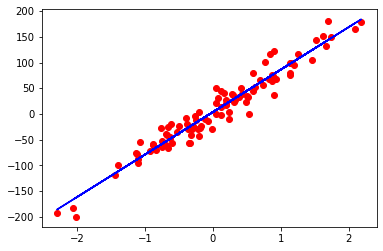

In [77]:
'''
<Training Pipeline>
[1] Prepare Data
[2] Model
[3] Loss/Optimizer
[4] Training Loop
'''
# Hyperparameters
learning_rate = 0.01
num_epochs = 15000

# [1] Prepare Data
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))

Y = Y.unsqueeze(1)

n_samples, n_features = X.shape

input_size = n_features
output_size = 1

# [1] Model
model = nn.Sequential(
    nn.Linear(input_size, output_size)
)

# [2] Loss/Optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# [3] Training Loop
for epoch in range(num_epochs):
    # Forwardprop
    Y_pred = model(X)
    
    # Calculate Loss
    loss = loss_fn(Y, Y_pred)
    
    # Backwardprop
    loss.backward()
    
    # Gradient Descent
    optimizer.step()
    
    # Zero-out gradients
    optimizer.zero_grad()
    
    if epoch % 1000 == 0:
        print(f"epoch {epoch}| Loss: {loss}")
    

predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# <a name="logistic-regression">6. Logistic Regression</a>

In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Hyperparameters
learning_rate = 0.01
num_epochs = 10000

# [1] Prepare Data
bc = datasets.load_breast_cancer()
X, Y = bc.data, bc.target

n_samples, n_features = X.shape
print("X shape:",X.shape)

### Train/Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

### Scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Convert numpy to torch
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32))
Y_test = torch.from_numpy(Y_test.astype(np.float32))

### Fit data shape
Y_train = Y_train.unsqueeze(1)
Y_test = Y_test.unsqueeze(1)

# [2] Model
class LogisticRegression(nn.Module):
    def __init__(self, in_features):
        super(LogisticRegression, self).__init__()
        
        self.linear1 = nn.Linear(in_features, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        return self.sigmoid(self.linear1(x))

model = LogisticRegression(n_features)

# [3] Loss/Optimizer
loss_fn = nn.BCELoss() # Binary Cross Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# [4] Training Loop
for epoch in range(num_epochs+1):
    Y_pred = model(X_train)
    loss = loss_fn(Y_pred, Y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 1000 == 0:
        print(f"epoch {epoch}| Loss: {loss.item():.3f}")

# [5] Accuracy
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_classes = (y_pred > 0.5) # or y_predicted.round()
    accuracy = (y_pred_classes == Y_test).sum() / float(Y_test.shape[0])
    print("accuracy:", accuracy.item())

X shape: (569, 30)
epoch 0| Loss: 0.476
epoch 1000| Loss: 0.025
epoch 2000| Loss: 0.018
epoch 3000| Loss: 0.013
epoch 4000| Loss: 0.009
epoch 5000| Loss: 0.005
epoch 6000| Loss: 0.003
epoch 7000| Loss: 0.002
epoch 8000| Loss: 0.001
epoch 9000| Loss: 0.001
epoch 10000| Loss: 0.001
accuracy: 0.9649122953414917


# <a name="dataset-dataloader">7. Dataset and Dataloader</a>

In [148]:
import torchvision
from torch.utils.data import Dataset, DataLoader
import math

## <a name="dataset">7.1 Dataset</a>

In [171]:
class WineDataset(Dataset):
    def __init__(self):
        # dataloading
        xy = np.loadtxt('./test_data/wine/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]]) # (n_samples, 1)
        self.n_samples = xy.shape[0]
        
    def __getitem__(self, index):
        # dataset[index]
        return self.x[index], self.y[index] # return a tuple
        
    def __len__(self):
        # len(dataset)
        return self.n_samples

dataset = WineDataset()

### Quick Look at custom dataset

In [170]:
xy = np.loadtxt('./test_data/wine/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
print(xy.shape) # Both X and Y
dataset = WineDataset()
print(f"Dataset Length: {len(dataset)}")
print("Each element of dataset is:",type(dataset[0]))

(178, 14)
Dataset Length: 178
Each element of dataset is: <class 'tuple'>


## <a name="dataloader">7.2 Dataloader</a>

In [196]:
dataset = WineDataset()
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, drop_last=True)

# iterator
data_iter = iter(dataloader)
first_batch = data_iter.next()

print("1st batch X:",data[0].shape)
print("1st batch Y:",data[1].shape)

1st batch X: torch.Size([4, 13])
1st batch Y: torch.Size([4, 1])


### Training Loop using dataset/dataloader

In [207]:
# Hyperparameters
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.floor(total_samples / 4)


for epoch in range(num_epochs):
    for batch_idx, (x, y) in enumerate(dataloader):
        # forwardprop 
        # loss
        # backprop
        # gradient descent
        if(epoch == 0 and batch_idx == 0):
            print("X in each batch:",x.shape)
            print("Y in each batch:",y.shape)

X in each batch: torch.Size([4, 13])
Y in each batch: torch.Size([4, 1])


## <a name="torchvision-datasets">7.3 torchvision datasets - mnist, coco, cifar, ...</a>

### torchvision datasets

##### MNIST, coco, cifar, ....

In [212]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
batch_size = 64

train_dataset = datasets.MNIST(root='datasets/', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root='datasets/', train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# <a name="dataset-transforms">8. Dataset Transforms</a>

In [255]:
class WineDataset(Dataset):
    def __init__(self, transform=None):
        # dataloading
        xy = np.loadtxt('./test_data/wine/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        
        # Note that we didn't convert numpy to tensor here unlike above\
        self.x = x[:, 1:].numpy()
        self.y = y[:, 0:1].numpy()
        
        self.transform = transform
        
        self.n_samples = xy.shape[0]
        
    def __getitem__(self, index):
        # dataset[index]
        sample = self.x[index], self.y[index] # return a tuple
        
        if self.transform:
            sample = self.transform(sample)
        
        return sample
        
    def __len__(self):
        # len(dataset)
        return self.n_samples

dataset = WineDataset()

### ToTensor: numpy -> tensor

#### Without ToTensor Transform

In [260]:
first_data = dataset[0]

features, labels = first_data

print(type(features))
print(type(labels))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


#### With ToTensor Transform

In [261]:
class ToTensor:
    def __call__(self, sample):
        # sample - callable object
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

In [262]:
dataset = WineDataset(transform=ToTensor())

In [263]:
first_data = dataset[0]

features, labels = first_data

print(type(features))
print(type(labels))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


### Compose Transforms

In [268]:
import torchvision.transforms as transforms

class MulTransform:
    def __init__(self, factor):
        self.factor = factor
    
    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets

In [269]:
my_transforms = transforms.Compose([
    ToTensor(),
    MulTransform(2)
])

dataset = WineDataset(transform=my_transforms)

In [270]:
first_data = dataset[0]

features, labels = first_data

print(type(features))
print(type(labels))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


# <a name="softmas-crossentropy">9. Softmax and Cross-Entropy</a>

### Softmax

In [4]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis = 0)

x = np.array([2.0, 1.0, 0.1])
output = softmax(x)
print('softmax numpy:', output)

x = torch.tensor([2.0, 1.0, 0.1])
output = torch.softmax(x, dim = 0)
print(output)

softmax numpy: [0.65900114 0.24243297 0.09856589]
tensor([0.6590, 0.2424, 0.0986])


### Cross-Entropy

#### D(Y_hat, Y) = -(1/N) * sum(Y, log(Y_hat))
### [WARNING] 
* nn.CrossEntropyLoss already applied softmax - we must not implement softmax on our own!
* Y has class labels, not ONE-HOT!
* Y_pred has raw scores (logits), no Softmax!

In [20]:
def cross_entropy(y, y_hat):
    loss = -np.sum(y * np.log(y_hat))
    return loss

Y = np.array([1, 0, 0])

y_hat_good = np.array([0.7, 0.2, 0.1])
y_hat_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, y_hat_good)
l2 = cross_entropy(Y, y_hat_bad)

print(f"Loss1 numpy: {l1:.4f}")
print(f"Loss2 numpy: {l2:.4f}")

print("-"*50)

###### PYTORCH ########

# 3 samples 
Y = torch.tensor([2, 0, 1]) # only put correct class labels, not one-hot encoded / (nsamples x nclasses)

# n_samples x n_classes = 3 x 3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1],[2.0, 1.0, 0.1],[0.1, 3.0, 0.1]]) # raw value -> no softmax!
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1],[0.1, 1.0, 2.1],[0.1, 3.0, 0.1]])

loss = nn.CrossEntropyLoss()

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f"Loss1 torch: {l1.item():.4f}")
print(f"Loss2 torch: {l2.item():.4f}")

_, pred1 = torch.max(Y_pred_good, dim=1)
_, pred2 = torch.max(Y_pred_bad, dim=1)

print(pred1)
print(pred2)


Loss1 numpy: 0.3567
Loss2 numpy: 2.3026
--------------------------------------------------
Loss1 torch: 0.3018
Loss2 torch: 1.6242
tensor([2, 0, 1])
tensor([0, 2, 1])


# <a name="feedforward-net">10. Feed Forward Net</a>

In [118]:
# Device Config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 10
batch_size = 512
learning_rate = 0.001

# Dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=False)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, drop_last = True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, drop_last = True)

torch.Size([512, 1, 28, 28])
torch.Size([512])


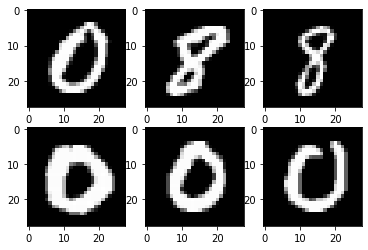

In [119]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape)
print(labels.shape)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')

plt.show()

In [120]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [121]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [122]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [123]:
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for batch_idx, (x, y) in enumerate(train_loader):
        x = x.reshape(-1, 28*28).to(device)
        # y = shape(64), NO one-hot encoding! just leave as it is
        
        #forward
        y_pred = model(x)
        
        #loss
        loss = loss_fn(y_pred, y)
        
        #backward
        loss.backward()
        
        #gradient descent
        optimizer.step()
        
        #zero gradients
        optimizer.zero_grad()
        if batch_idx % 100 == 0:
            print(f"epoch{epoch}| loss:{loss.item()}")

epoch0| loss:2.2924070358276367
epoch0| loss:0.31495508551597595
epoch1| loss:0.2921135425567627
epoch1| loss:0.29330411553382874
epoch2| loss:0.228903129696846
epoch2| loss:0.20731891691684723
epoch3| loss:0.22773289680480957
epoch3| loss:0.16507260501384735
epoch4| loss:0.15580104291439056
epoch4| loss:0.15195779502391815
epoch5| loss:0.17612873017787933
epoch5| loss:0.17884905636310577
epoch6| loss:0.1344349980354309
epoch6| loss:0.12804560363292694
epoch7| loss:0.13447771966457367
epoch7| loss:0.12602375447750092
epoch8| loss:0.09830492734909058
epoch8| loss:0.09955698251724243
epoch9| loss:0.11981098353862762
epoch9| loss:0.09619618207216263


In [91]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    for x, y in test_loader:
        x = x.reshape(-1, 28*28).to(device)
        y = y.to(device)
        y_pred = model(x)
        
        _, predictions = torch.max(y_pred, dim=1)
        n_samples += y.shape[0]
        n_correct += (predictions == y).sum().item()
        
    accuracy = 100.0 * n_correct / n_samples
    print(f"accuracy: {accuracy}")

accuracy: 97.12


# <a name="cnn">11. CNN</a>

In [150]:
#Hyperparameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_epochs = 100
batch_size = 64
learning_rate = 0.01

my_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=my_transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=my_transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [151]:
example = iter(train_loader)
samples, labels = example.next()
print(samples.shape)
print(labels.shape)

torch.Size([64, 3, 32, 32])
torch.Size([64])


### Model

In [152]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.reshape(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # No Activation or Softmax cuz Cross-Entropy already includes them
        return x
        
model = CNN().to(device)

### Loss / Optimizer

In [153]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Training

In [154]:
for epoch in range(num_epochs):
    for batch_idx, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()
        
        if batch_idx == 0:
            print(f"epoch{epoch}| Loss:{loss}")
        

epoch0| Loss:2.3194258213043213
epoch1| Loss:2.2163162231445312
epoch2| Loss:1.9535205364227295
epoch3| Loss:2.016279458999634
epoch4| Loss:1.6039097309112549
epoch5| Loss:1.461698293685913
epoch6| Loss:1.566805124282837
epoch7| Loss:1.2426338195800781
epoch8| Loss:1.7180901765823364
epoch9| Loss:1.3615368604660034
epoch10| Loss:1.448979377746582
epoch11| Loss:1.4639530181884766
epoch12| Loss:1.2979403734207153
epoch13| Loss:1.0745251178741455
epoch14| Loss:1.0791819095611572
epoch15| Loss:1.0769681930541992
epoch16| Loss:1.0116138458251953
epoch17| Loss:1.2534679174423218
epoch18| Loss:1.0635095834732056
epoch19| Loss:1.1331738233566284
epoch20| Loss:1.129142165184021
epoch21| Loss:1.069625735282898
epoch22| Loss:1.3173127174377441
epoch23| Loss:1.0502465963363647
epoch24| Loss:0.854570746421814
epoch25| Loss:1.045387864112854
epoch26| Loss:1.1977635622024536
epoch27| Loss:0.8352165818214417
epoch28| Loss:1.040642261505127
epoch29| Loss:1.031670093536377
epoch30| Loss:0.81999045610427

KeyboardInterrupt: 

### Testing

In [155]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    
    for x, y in test_loader:
        x = x.to(device)
        y = y.to(device)
        y_pred = model(x)
        
        # max returns
        _, predicted = torch.max(y_pred, dim=1)
        n_samples += y.shape[0]
        n_correct += (predicted == y).sum().item()
        
        for i in range(batch_size):
            label = y[i]
            predicted_label = predicted[i]
            
            if label == predicted_label:
                n_class_correct[label] += 1
            n_class_samples[label] += 1
        
    accuracy = 100.0 * n_correct / n_samples
    print(f"Accuracy: {accuracy}")

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f"Accuracy of {classes[i]}: {acc}")

Accuracy: 63.88221153846154
Accuracy of plane: 68.00401203610832
Accuracy of car: 76.02808425275828
Accuracy of bird: 51.80360721442886
Accuracy of cat: 41.18236472945892
Accuracy of deer: 65.36536536536536
Accuracy of dog: 54.154154154154156
Accuracy of frog: 69.06906906906907
Accuracy of horse: 69.9
Accuracy of ship: 80.74222668004012
Accuracy of truck: 62.6


# <a name="transfer-learning">12. Transfer Learning</a>

* Look up furthermore: ImageFolder, lr scheduler

In [17]:
from torchvision import datasets, models, transforms
import torch.optim as optim
from torch.optim import lr_scheduler

In [3]:
model = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/jasonlee/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [5]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [12]:
model.fc.in_features

512

### Fine Tuning

In [21]:
# freeze all the layers before up to fc
for param in model.parameters():
    param.requires_grad = False
    
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)

### Loss / Optimizer

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

### Scheduler

In [22]:
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1) # every 7 epochs, lr is multiplied by 0.1

### Train

In [20]:
# model = train_model(model, loss_fn, optimizer, scheduler, num_epochs=20)

# <a name="tensorboard">13. Tensorboard</a>

In [3]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages')

In [4]:
from torch.utils.tensorboard import SummaryWriter